In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import unicodedata

np.random.seed(0)
pd.set_option('display.max_columns', None)
df = pd.read_csv("/Users/rodrigoconsuelos/Documents/7tosemestre(noveno)/Machine Learning/Proyecto/defunciones_23_ML_P2/Defunciones_Mex_2023.csv")

/var/folders/df/8dr6djcs6sl7rbpq6p2y0v9w0000gn/T/ipykernel_69140/917858432.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/rodrigoconsuelos/Documents/7tosemestre(noveno)/Machine Learning/Proyecto/defunciones_23_ML_P2/Defunciones_Mex_2023.csv")


In [53]:
df

,ent_regis,mun_regis,tloc_regis,loc_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,causa_def,cod_adicio,lista_mex,sexo,ent_nac,afromex,conindig,lengua,cve_lengua,nacionalid,nacesp_cve,edad,sem_gest,gramos,dia_ocurr,mes_ocurr,anio_ocur,dia_regis,mes_regis,anio_regis,dia_nacim,mes_nacim,anio_nacim,cond_act,ocupacion,escolarida,edo_civil,tipo_defun,ocurr_trab,lugar_ocur,par_agre,vio_fami,asist_medi,cirugia,natviole,necropsia,usonecrops,encefalica,donador,sitio_ocur,cond_cert,derechohab,embarazo,rel_emba,horas,minutos,capitulo,grupo,lista1,gr_lismex,area_ur,edad_agru,complicaro,dia_cert,mes_cert,anio_cert,maternas,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
0,1,1,500 000 a 999 999 habitantes,1,Zacatecas,44,5 000 a 9 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,"Neumonía, no especificada",NaN,Neumonía,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Setenta y tres años,88,8888,18,12,2022,4,1,2023,8,4,1949,Sí,Profesores y especialistas en docencia,Profesional,Divorciado(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No especificada,No aplica,ISSSTE,Otro médico,IMSS,No especificada,No especificada,21,50,10,2,Neumonía,NaN,Urbana,De 70 a 74 años,No especificada,18,Diciembre,2022,NaN,88,888,8888,NaN,999
1,1,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Síndrome de dificultad respiratoria del adulto,NaN,Las demás enfermedades del aparato respiratorio,Mujer,16,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Setenta y siete años,88,8888,12,12,2022,4,1,2023,12,7,1945,No,No trabaja,Sin escolaridad,Soltero(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No,No aplica,Secretaría de salud,Médico tratante,Ninguna,No especificada,No especificada,0,50,10,7,Resto de enfermedades del sistema respiratorio,NaN,Urbana,De 75 a 79 años,No especificada,12,Diciembre,2022,NaN,88,888,8888,NaN,999
2,1,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Enfermedad pulmonar obstructiva crónica con in...,NaN,Enfermedades pulmonares obstructivas crónicas,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Sesenta y nueve años,88,8888,17,12,2022,4,1,2023,24,10,1953,No,No trabaja,Primaria incompleta,Viudo(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No,No aplica,Secretaría de salud,Otro médico,Ninguna,No especificada,No especificada,20,15,10,5,Enfermedades crónicas de las vías respirat...,NaN,Urbana,De 65 a 69 años,No especificada,17,Diciembre,2022,NaN,88,888,8888,NaN,999
3,1,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Desnutrición proteicocalórica leve,NaN,Otras desnutriciones proteinocalóricas,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Noventa y cuatro años,88,8888,1,1,2023,5,1,2023,31,10,1928,No,No trabaja,Primaria incompleta,Soltero(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No,No aplica,Hogar,Otro médico,Ninguna,No especificada,No especificada,13,0,4,5,Desnutrición,NaN,Urbana,De 90 a 94 años,No especificada,1,Enero,2023,NaN,88,888,8888,NaN,999
4,1,

In [54]:
df_final =  df[df["lista_mex"].isin(["Infarto agudo del miocardio", "Diabetes mellitus", "Neumonía", "Agresiones (homicidios)", "Otras enfermedades del hígado", "Enfermedades pulmonares obstructivas crónicas"])].reset_index()


In [55]:
df_final

,index,ent_regis,mun_regis,tloc_regis,loc_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,causa_def,cod_adicio,lista_mex,sexo,ent_nac,afromex,conindig,lengua,cve_lengua,nacionalid,nacesp_cve,edad,sem_gest,gramos,dia_ocurr,mes_ocurr,anio_ocur,dia_regis,mes_regis,anio_regis,dia_nacim,mes_nacim,anio_nacim,cond_act,ocupacion,escolarida,edo_civil,tipo_defun,ocurr_trab,lugar_ocur,par_agre,vio_fami,asist_medi,cirugia,natviole,necropsia,usonecrops,encefalica,donador,sitio_ocur,cond_cert,derechohab,embarazo,rel_emba,horas,minutos,capitulo,grupo,lista1,gr_lismex,area_ur,edad_agru,complicaro,dia_cert,mes_cert,anio_cert,maternas,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
0,0,1,1,500 000 a 999 999 habitantes,1,Zacatecas,44,5 000 a 9 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,"Neumonía, no especificada",NaN,Neumonía,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Setenta y tres años,88,8888,18,12,2022,4,1,2023,8,4,1949,Sí,Profesores y especialistas en docencia,Profesional,Divorciado(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No especificada,No aplica,ISSSTE,Otro médico,IMSS,No especificada,No especificada,21,50,10,2,Neumonía,NaN,Urbana,De 70 a 74 años,No especificada,18,Diciembre,2022,NaN,88,888,8888,NaN,999
1,2,1,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Enfermedad pulmonar obstructiva crónica con in...,NaN,Enfermedades pulmonares obstructivas crónicas,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Sesenta y nueve años,88,8888,17,12,2022,4,1,2023,24,10,1953,No,No trabaja,Primaria incompleta,Viudo(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No,No aplica,Secretaría de salud,Otro médico,Ninguna,No especificada,No especificada,20,15,10,5,Enfermedades crónicas de las vías respirat...,NaN,Urbana,De 65 a 69 años,No especificada,17,Diciembre,2022,NaN,88,888,8888,NaN,999
2,7,1,1,2 500 a 4 999 habitantes,239,Aguascalientes,1,500 000 a 999 999 habitantes,1,Aguascalientes,5,50 000 a 74 999 habitantes,1,"Infarto agudo del miocardio, sin otra especifi...",NaN,Infarto agudo del miocardio,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Ochenta y cuatro años,88,8888,15,11,2022,2,1,2023,20,10,1938,No,No trabaja,Primaria incompleta,Casado(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No,No aplica,IMSS,Médico tratante,IMSS,No especificada,No especificada,0,31,9,4,Enfermedades isquémicas del corazón,NaN,Urbana,De 80 a 84 años,No especificada,15,Noviembre,2022,NaN,88,888,8888,NaN,999
3,8,1,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,1 000 a 1 999 habitantes,127,Aguascalientes,1,1 000 a 1 999 habitantes,7777,"Infarto agudo del miocardio, sin otra especifi...",NaN,Infarto agudo del miocardio,Hombre,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Cincuenta y cinco años,88,8888,7,1,2023,11,1,2023,27,2,1967,Sí,Trabajadores en actividades agrícolas y ganaderas,Primaria completa,Casado(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Sin asistencia médica,No especificada,No,No especificada,No aplica,No especificada,No aplica,Hogar,Otro médico,Ninguna,No aplica,No aplica,12,0,9,4,Enfermedades isquémicas del corazón,NaN,Rural,De 55 a 59 años,No aplica,7

In [56]:


rangos_pesos = {
    "Infarto agudo del miocardio": (60, 80),
    "Diabetes mellitus": (50, 80),
    "Neumonía": (50, 60),
    "Agresiones (homicidios)": (50, 75),
    "Otras enfermedades del hígado": (50, 75),
    "Enfermedades pulmonares obstructivas crónicas": (55, 65)
}


def asignar_peso(causa):
    if causa in rangos_pesos:
        rango = rangos_pesos[causa]
        return int(np.random.uniform(rango[0], rango[1]))
    else:
        return np.nan

df_final['Peso'] = df_final['lista_mex'].apply(asignar_peso)



In [57]:
df_final

,index,ent_regis,mun_regis,tloc_regis,loc_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,causa_def,cod_adicio,lista_mex,sexo,ent_nac,afromex,conindig,lengua,cve_lengua,nacionalid,nacesp_cve,edad,sem_gest,gramos,dia_ocurr,mes_ocurr,anio_ocur,dia_regis,mes_regis,anio_regis,dia_nacim,mes_nacim,anio_nacim,cond_act,ocupacion,escolarida,edo_civil,tipo_defun,ocurr_trab,lugar_ocur,par_agre,vio_fami,asist_medi,cirugia,natviole,necropsia,usonecrops,encefalica,donador,sitio_ocur,cond_cert,derechohab,embarazo,rel_emba,horas,minutos,capitulo,grupo,lista1,gr_lismex,area_ur,edad_agru,complicaro,dia_cert,mes_cert,anio_cert,maternas,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax,Peso
0,0,1,1,500 000 a 999 999 habitantes,1,Zacatecas,44,5 000 a 9 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,"Neumonía, no especificada",NaN,Neumonía,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Setenta y tres años,88,8888,18,12,2022,4,1,2023,8,4,1949,Sí,Profesores y especialistas en docencia,Profesional,Divorciado(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No especificada,No aplica,ISSSTE,Otro médico,IMSS,No especificada,No especificada,21,50,10,2,Neumonía,NaN,Urbana,De 70 a 74 años,No especificada,18,Diciembre,2022,NaN,88,888,8888,NaN,999,55
1,2,1,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Enfermedad pulmonar obstructiva crónica con in...,NaN,Enfermedades pulmonares obstructivas crónicas,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Sesenta y nueve años,88,8888,17,12,2022,4,1,2023,24,10,1953,No,No trabaja,Primaria incompleta,Viudo(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No,No aplica,Secretaría de salud,Otro médico,Ninguna,No especificada,No especificada,20,15,10,5,Enfermedades crónicas de las vías respirat...,NaN,Urbana,De 65 a 69 años,No especificada,17,Diciembre,2022,NaN,88,888,8888,NaN,999,62
2,7,1,1,2 500 a 4 999 habitantes,239,Aguascalientes,1,500 000 a 999 999 habitantes,1,Aguascalientes,5,50 000 a 74 999 habitantes,1,"Infarto agudo del miocardio, sin otra especifi...",NaN,Infarto agudo del miocardio,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Ochenta y cuatro años,88,8888,15,11,2022,2,1,2023,20,10,1938,No,No trabaja,Primaria incompleta,Casado(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No,No aplica,IMSS,Médico tratante,IMSS,No especificada,No especificada,0,31,9,4,Enfermedades isquémicas del corazón,NaN,Urbana,De 80 a 84 años,No especificada,15,Noviembre,2022,NaN,88,888,8888,NaN,999,72
3,8,1,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,1 000 a 1 999 habitantes,127,Aguascalientes,1,1 000 a 1 999 habitantes,7777,"Infarto agudo del miocardio, sin otra especifi...",NaN,Infarto agudo del miocardio,Hombre,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Cincuenta y cinco años,88,8888,7,1,2023,11,1,2023,27,2,1967,Sí,Trabajadores en actividades agrícolas y ganaderas,Primaria completa,Casado(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Sin asistencia médica,No especificada,No,No especificada,No aplica,No especificada,No aplica,Hogar,Otro médico,Ninguna,No aplica,No aplica,12,0,9,4,Enfermedades isquémicas del corazón,NaN,Rural,De 55 a 59 añ

In [58]:
df_final['Peso'].value_counts()

62    14583
61    14515
60    14513
64    14460
63    14454
73    12762
66    12679
68    12659
70    12622
74    12584
71    12577
67    12541
69    12516
72    12441
65    12431
56    11397
59    11274
57    11249
55    11158
58    11139
79    10339
75    10234
78    10207
76    10126
77    10109
52     9464
51     9454
54     9337
53     9332
50     9300
Name: Peso, dtype: int64

In [59]:
def asignar_covid_influenza(causa):
    if causa in ["Neumonía", "Enfermedades pulmonares obstructivas crónicas"]:
        return np.random.choice(["Sí", "No"], p=[0.7, 0.3])  # 70% de probabilidad de "Sí"
    else:
        return np.random.choice(["Sí", "No"], p=[0.3, 0.7])  # 30% de probabilidad de "Sí"

df_final['COVID_Influenza'] = df_final['lista_mex'].apply(asignar_covid_influenza)


In [60]:
df_final

,index,ent_regis,mun_regis,tloc_regis,loc_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,causa_def,cod_adicio,lista_mex,sexo,ent_nac,afromex,conindig,lengua,cve_lengua,nacionalid,nacesp_cve,edad,sem_gest,gramos,dia_ocurr,mes_ocurr,anio_ocur,dia_regis,mes_regis,anio_regis,dia_nacim,mes_nacim,anio_nacim,cond_act,ocupacion,escolarida,edo_civil,tipo_defun,ocurr_trab,lugar_ocur,par_agre,vio_fami,asist_medi,cirugia,natviole,necropsia,usonecrops,encefalica,donador,sitio_ocur,cond_cert,derechohab,embarazo,rel_emba,horas,minutos,capitulo,grupo,lista1,gr_lismex,area_ur,edad_agru,complicaro,dia_cert,mes_cert,anio_cert,maternas,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax,Peso,COVID_Influenza
0,0,1,1,500 000 a 999 999 habitantes,1,Zacatecas,44,5 000 a 9 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,"Neumonía, no especificada",NaN,Neumonía,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Setenta y tres años,88,8888,18,12,2022,4,1,2023,8,4,1949,Sí,Profesores y especialistas en docencia,Profesional,Divorciado(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No especificada,No aplica,ISSSTE,Otro médico,IMSS,No especificada,No especificada,21,50,10,2,Neumonía,NaN,Urbana,De 70 a 74 años,No especificada,18,Diciembre,2022,NaN,88,888,8888,NaN,999,55,Sí
1,2,1,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Enfermedad pulmonar obstructiva crónica con in...,NaN,Enfermedades pulmonares obstructivas crónicas,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Sesenta y nueve años,88,8888,17,12,2022,4,1,2023,24,10,1953,No,No trabaja,Primaria incompleta,Viudo(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No,No aplica,Secretaría de salud,Otro médico,Ninguna,No especificada,No especificada,20,15,10,5,Enfermedades crónicas de las vías respirat...,NaN,Urbana,De 65 a 69 años,No especificada,17,Diciembre,2022,NaN,88,888,8888,NaN,999,62,No
2,7,1,1,2 500 a 4 999 habitantes,239,Aguascalientes,1,500 000 a 999 999 habitantes,1,Aguascalientes,5,50 000 a 74 999 habitantes,1,"Infarto agudo del miocardio, sin otra especifi...",NaN,Infarto agudo del miocardio,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Ochenta y cuatro años,88,8888,15,11,2022,2,1,2023,20,10,1938,No,No trabaja,Primaria incompleta,Casado(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No,No aplica,IMSS,Médico tratante,IMSS,No especificada,No especificada,0,31,9,4,Enfermedades isquémicas del corazón,NaN,Urbana,De 80 a 84 años,No especificada,15,Noviembre,2022,NaN,88,888,8888,NaN,999,72,No
3,8,1,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,1 000 a 1 999 habitantes,127,Aguascalientes,1,1 000 a 1 999 habitantes,7777,"Infarto agudo del miocardio, sin otra especifi...",NaN,Infarto agudo del miocardio,Hombre,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Cincuenta y cinco años,88,8888,7,1,2023,11,1,2023,27,2,1967,Sí,Trabajadores en actividades agrícolas y ganaderas,Primaria completa,Casado(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Sin asistencia médica,No especificada,No,No especificada,No aplica,No especificada,No aplica,Hogar,Otro médico,Ninguna,No aplica,No aplica,12,0,9,4,Enfermedades isquémicas del corazó

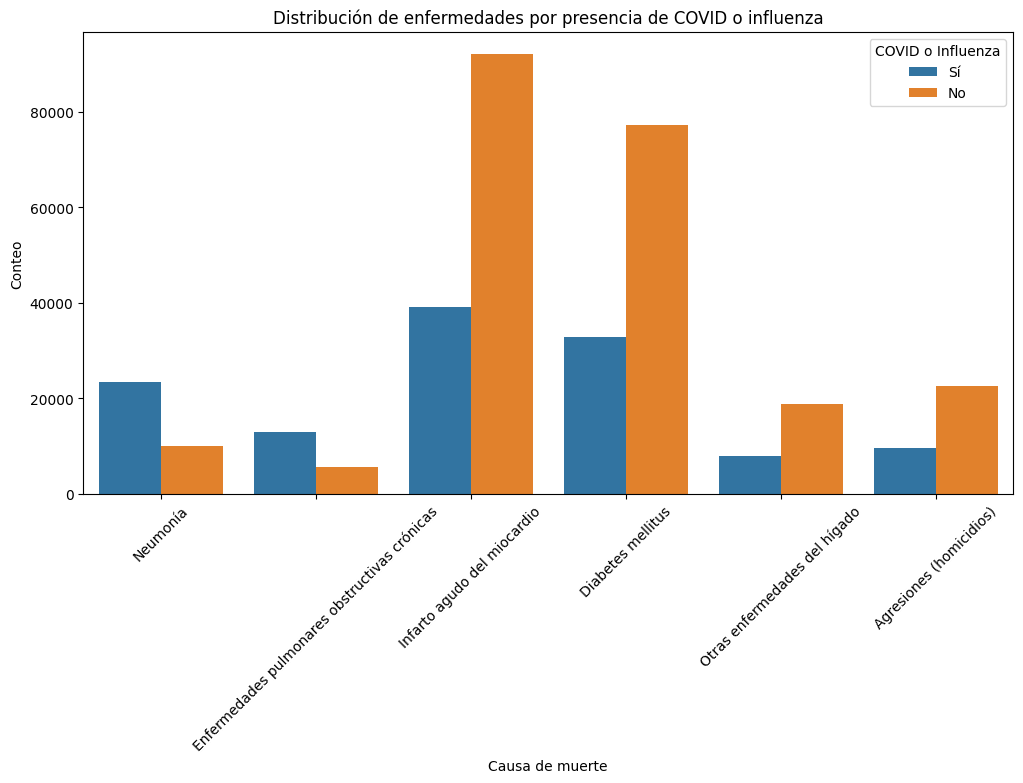

In [61]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df_final, x="lista_mex", hue="COVID_Influenza")
plt.title("Distribución de enfermedades por presencia de COVID o influenza")
plt.xlabel("Causa de muerte")
plt.ylabel("Conteo")
plt.xticks(rotation=45)
plt.legend(title="COVID o Influenza")
plt.show()


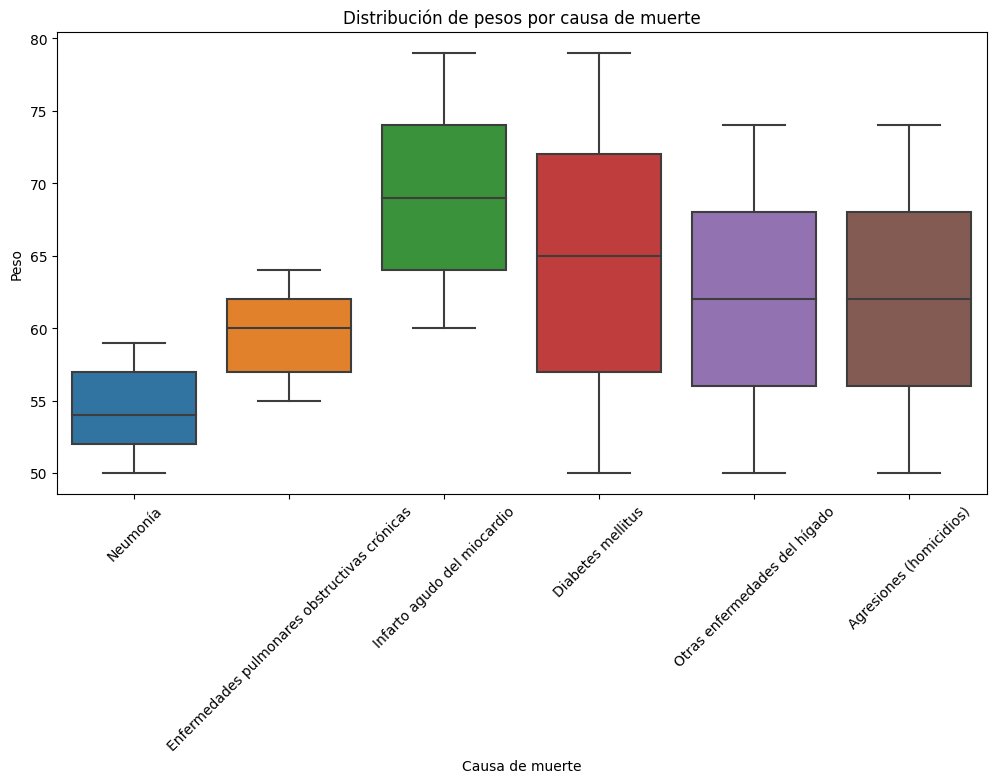

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.boxplot(data=df_final, x="lista_mex", y="Peso")
plt.title("Distribución de pesos por causa de muerte")
plt.xlabel("Causa de muerte")
plt.ylabel("Peso")
plt.xticks(rotation=45)
plt.show()


In [63]:
df_final = df_final[df_final['anio_ocur'] != 9999]
df_final = df_final[df_final['anio_nacim'] != 9999]
df_final['edad_final'] = df_final['anio_ocur'] - df_final['anio_nacim']

<AxesSubplot:xlabel='edad_final', ylabel='Count'>

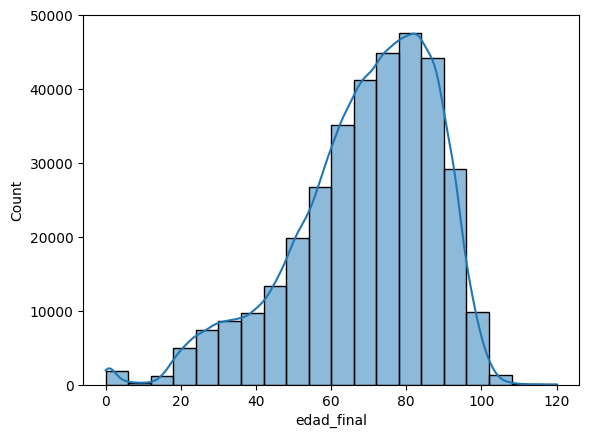

In [64]:
sns.histplot(data=df_final, x="edad_final", bins=20, kde=True)

In [65]:
#Drop rows which edad_final is less than 16
df_final = df_final[df_final['edad_final'] >= 12]

In [66]:
df_final['derechohab'] = df_final['derechohab'].str.strip()
df_final['derechohab'] = df_final['derechohab'].replace({
    'Instituto de Seguridad Social para las Fuerzas Armadas Mexicanas (ISSFAM)': 'ISSFAM',
    'Reportado como equivalente al Seguro Popular': 'Otra'
})

In [67]:
df_final['derechohab'].unique()

array(['IMSS', 'Ninguna', 'No especificada', 'Otra', 'ISSSTE',
       'IMSS BIENESTAR', 'SEDENA', 'ISSFAM', 'PEMEX', 'SEMAR'],
      dtype=object)

In [68]:
columnas_necesarias = ['sexo', 'edad_final', 'ocupacion', 'edo_civil', 'cond_act', 'derechohab','ent_ocurr','tloc_resid','mes_ocurr','horas', 'lista_mex', 'Peso', 'COVID_Influenza']
dff = df_final[columnas_necesarias]

dff

,sexo,edad_final,ocupacion,edo_civil,cond_act,derechohab,ent_ocurr,tloc_resid,mes_ocurr,horas,lista_mex,Peso,COVID_Influenza
0,Mujer,73,Profesores y especialistas en docencia,Divorciado(a),Sí,IMSS,Aguascalientes,5 000 a 9 999 habitantes,12,21,Neumonía,55,Sí
1,Mujer,69,No trabaja,Viudo(a),No,Ninguna,Aguascalientes,500 000 a 999 999 habitantes,12,20,Enfermedades pulmonares obstructivas crónicas,62,No
2,Mujer,84,No trabaja,Casado(a),No,IMSS,Aguascalientes,500 000 a 999 999 habitantes,11,0,Infarto agudo del miocardio,72,No
3,Hombre,56,Trabajadores en actividades agrícolas y ganaderas,Casado(a),Sí,Ninguna,Aguascalientes,1 000 a 1 999 habitantes,1,12,Infarto agudo del miocardio,70,Sí
4,Hombre,48,"Auxiliares y técnicos en ciencias exactas, bio...",Casado(a),Sí,Ninguna,Aguascalientes,5 000 a 9 999 habitantes,1,23,Infarto agudo del miocardio,68,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352451,Hombre,19,"Otros trabajadores en actividades agrícolas, g...",Soltero(a),Sí,No especificada,Zacatecas,1 a 999 habitantes,9,99,Agresiones (homicidios),65,No
352452,Mujer,24,No trabaja,Casado(a),No,No especificada,Zacatecas,100 000 a 249 999 habitantes,12,99,Agresiones (homicidios),56,Sí
352453,Hombre,20,"Otros comerciantes, empleados en ventas y agen...",Soltero(a),Sí,Ninguna,Zacatecas,100 000 a 249 999 habitantes,12,99,Agresiones (homicidios),72,No
352454,Hombre,40,Otros trabajadores en actividades elementales ...,Soltero(a),Sí,Ninguna,Zacatecas,100 000 a 249 999 habitantes,12,99,Agresiones (homicidios),55,No


In [69]:
import unicodedata

def quitar_acentos(texto):
    if isinstance(texto, str):
        return ''.join(
            c for c in unicodedata.normalize('NFD', texto)
            if unicodedata.category(c) != 'Mn'
        )
    return texto

dff = dff.applymap(quitar_acentos)


dff

,sexo,edad_final,ocupacion,edo_civil,cond_act,derechohab,ent_ocurr,tloc_resid,mes_ocurr,horas,lista_mex,Peso,COVID_Influenza
0,Mujer,73,Profesores y especialistas en docencia,Divorciado(a),Si,IMSS,Aguascalientes,5 000 a 9 999 habitantes,12,21,Neumonia,55,Si
1,Mujer,69,No trabaja,Viudo(a),No,Ninguna,Aguascalientes,500 000 a 999 999 habitantes,12,20,Enfermedades pulmonares obstructivas cronicas,62,No
2,Mujer,84,No trabaja,Casado(a),No,IMSS,Aguascalientes,500 000 a 999 999 habitantes,11,0,Infarto agudo del miocardio,72,No
3,Hombre,56,Trabajadores en actividades agricolas y ganaderas,Casado(a),Si,Ninguna,Aguascalientes,1 000 a 1 999 habitantes,1,12,Infarto agudo del miocardio,70,Si
4,Hombre,48,"Auxiliares y tecnicos en ciencias exactas, bio...",Casado(a),Si,Ninguna,Aguascalientes,5 000 a 9 999 habitantes,1,23,Infarto agudo del miocardio,68,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352451,Hombre,19,"Otros trabajadores en actividades agricolas, g...",Soltero(a),Si,No especificada,Zacatecas,1 a 999 habitantes,9,99,Agresiones (homicidios),65,No
352452,Mujer,24,No trabaja,Casado(a),No,No especificada,Zacatecas,100 000 a 249 999 habitantes,12,99,Agresiones (homicidios),56,Si
352453,Hombre,20,"Otros comerciantes, empleados en ventas y agen...",Soltero(a),Si,Ninguna,Zacatecas,100 000 a 249 999 habitantes,12,99,Agresiones (homicidios),72,No
352454,Hombre,40,Otros trabajadores en actividades elementales ...,Soltero(a),Si,Ninguna,Zacatecas,100 000 a 249 999 habitantes,12,99,Agresiones (homicidios),55,No


In [70]:
X = dff.drop('lista_mex', axis=1)
y = dff['lista_mex']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=101)

numerical_features = X.select_dtypes(include=['int64', 'float64'])
categorical_features = X.select_dtypes(exclude=['int64', 'float64'])

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

In [80]:

preprocesador = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_features.columns),
        ('cat', categorical_transformer, categorical_features.columns)
    ]
)

model = Pipeline(
    steps=[
        ('preprocesor', preprocesador),
        ('class', RandomForestClassifier(class_weight='balanced', max_depth=20,
                                        min_samples_split=500, n_estimators=600,
                                        random_state=42, n_jobs=-1))
    ]
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [81]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print(classification_report(y_test, y_pred))

                                               precision    recall  f1-score   support

                      Agresiones (homicidios)       0.57      0.87      0.68      7195
                            Diabetes mellitus       0.56      0.19      0.29     27368
Enfermedades pulmonares obstructivas cronicas       0.30      0.63      0.41      4606
                  Infarto agudo del miocardio       0.66      0.68      0.67     32433
                                     Neumonia       0.45      0.72      0.56      8042
                Otras enfermedades del higado       0.19      0.29      0.23      6610

                                     accuracy                           0.51     86254
                                    macro avg       0.46      0.56      0.47     86254
                                 weighted avg       0.55      0.51      0.49     86254



<AxesSubplot:>

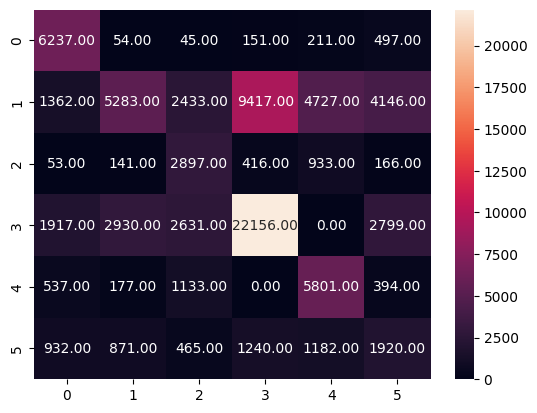

In [82]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='.2f')

In [ ]:
#Grid Search

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features.columns),
        ('cat', categorical_transformer, categorical_features.columns)
    ]
)

# Pipeline completo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('class', RandomForestClassifier(class_weight='balanced',random_state=42))  # Modelo base
])

In [40]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros para el Grid Search
param_grid = {
    'class__n_estimators': [200,400,600],
    'class__max_depth': [5, 10, 20],
    'class__min_samples_split': [500, 1000, 1500],
    'class__min_samples_leaf': [1, 2, 4],
    'class__max_features': ['sqrt', 'log2']
}

# Configurar el Grid Search
grid_search = GridSearchCV(
    estimator=model,  # Pipeline definido anteriormente
    param_grid=param_grid,
    scoring='f1_weighted',  # Cambia según tu métrica preferida
    cv=5,  # Validación cruzada con 5 particiones
    n_jobs=-1,  # Usar todos los núcleos disponibles
)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mejor modelo y resultados
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

# Predicciones con el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores hiperparámetros: {'class__max_depth': 20, 'class__max_features': 'sqrt', 'class__min_samples_leaf': 1, 'class__min_samples_split': 500, 'class__n_estimators': 600}
Mejor puntuación: 0.48704550335309327


In [42]:
best_model = grid_search.best_estimator_
print("Modelo completo configurado:")
print(best_model)


Modelo completo configurado:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['edad_final', 'mes_ocurr', 'horas', 'Peso'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['sexo', 'ocupacion', 'edo_civil', 'cond_act', 'derechohab', 'ent_ocurr',
       'tloc_resid', 'COVID_Influenza'],
      dtype='object'))])),
                ('class',
                 RandomForestClassifier(class_weight='balanced', max_depth=20,
                                        min_samples_split=500, n_estimators=600,
                                        random_state=42))])


In [51]:
# Obtener nombres de las características transformadas
feature_names = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

# Obtener importancias de las características
importances = grid_search.best_estimator_.named_steps['class'].feature_importances_

# Crear un DataFrame con la importancia
importancia_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importancia_df)


                                               Feature  Importance
3                                            num__Peso    0.340309
0                                      num__edad_final    0.294296
126                            cat__COVID_Influenza_Si    0.081134
2                                           num__horas    0.031208
67                                    cat__cond_act_Si    0.027777
..                                                 ...         ...
17   cat__ocupacion_Coordinadores y jefes de area d...    0.000008
5                            cat__sexo_No especificado    0.000007
14                        cat__ocupacion_Busca trabajo    0.000005
25   cat__ocupacion_Ensambladores y montadores de h...    0.000002
33   cat__ocupacion_Operadores de maquinaria agrope...    0.000001

[127 rows x 2 columns]


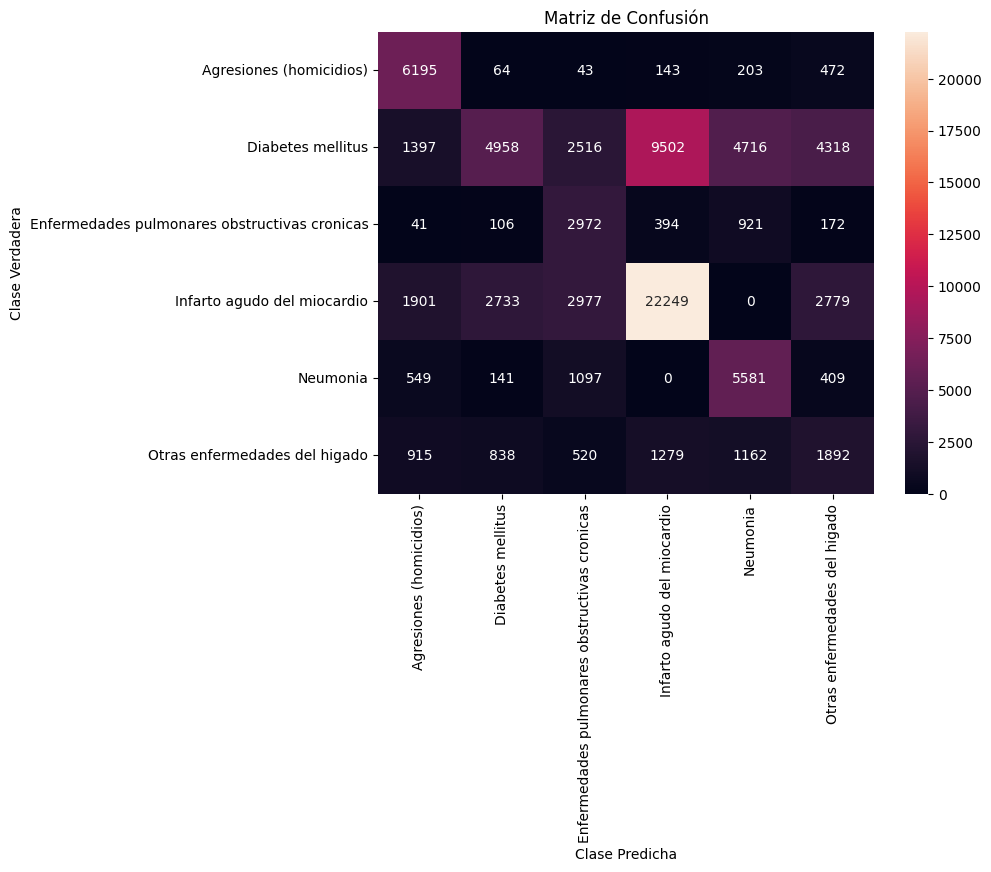

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Matriz de Confusión")
plt.ylabel("Clase Verdadera")
plt.xlabel("Clase Predicha")
plt.show()


In [ ]:
# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=best_model.classes_))


Reporte de clasificación:
                                               precision    recall  f1-score   support

                      Agresiones (homicidios)       0.56      0.87      0.68      7120
                            Diabetes mellitus       0.56      0.18      0.27     27407
Enfermedades pulmonares obstructivas cronicas       0.29      0.65      0.40      4606
                  Infarto agudo del miocardio       0.66      0.68      0.67     32639
                                     Neumonia       0.44      0.72      0.55      7777
                Otras enfermedades del higado       0.19      0.29      0.23      6606

                                     accuracy                           0.51     86155
                                    macro avg       0.45      0.56      0.47     86155
                                 weighted avg       0.55      0.51      0.49     86155



In [74]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features.columns),
        ('cat', categorical_transformer, categorical_features.columns)
    ]
)

# Pipeline completo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('class', RandomForestClassifier(random_state=42))  # Modelo base
])

In [75]:
# Definir los hiperparámetros para el Grid Search
param_grid = {
    'class__n_estimators': [200,400,600,1000],
    'class__max_depth': [5, 10, 20],
    'class__min_samples_split': [500, 1000, 1500],
    'class__min_samples_leaf': [1, 2, 4],
}

# Configurar el Grid Search
grid_search = GridSearchCV(
    estimator=model,  # Pipeline definido anteriormente
    param_grid=param_grid,
    scoring='accuracy',  # Cambia según tu métrica preferida
    cv=5,  # Validación cruzada con 5 particiones
    n_jobs=-1,  # Usar todos los núcleos disponibles
)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mejor modelo y resultados
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

# Predicciones con el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores hiperparámetros: {'class__max_depth': 20, 'class__min_samples_leaf': 1, 'class__min_samples_split': 500, 'class__n_estimators': 400}
Mejor puntuación: 0.5805373304329254


In [76]:
best_model = grid_search.best_estimator_
print("Modelo completo configurado:")
print(best_model)


Modelo completo configurado:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['edad_final', 'mes_ocurr', 'horas', 'Peso'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['sexo', 'ocupacion', 'edo_civil', 'cond_act', 'derechohab', 'ent_ocurr',
       'tloc_resid', 'COVID_Influenza'],
      dtype='object'))])),
                ('class',
                 RandomForestClassifier(max_depth=20, min_samples_split=500,
                                        n_estimators=400, random_state=42))])


In [77]:
# Obtener nombres de las características transformadas
feature_names = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

# Obtener importancias de las características
importances = grid_search.best_estimator_.named_steps['class'].feature_importances_

# Crear un DataFrame con la importancia
importancia_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importancia_df)


                                               Feature  Importance
3                                            num__Peso    0.454091
0                                      num__edad_final    0.273341
127                            cat__COVID_Influenza_Si    0.055696
2                                           num__horas    0.027697
68                                    cat__cond_act_Si    0.015398
..                                                 ...         ...
57   cat__ocupacion_Trabajadores en servicios de al...    0.000007
33   cat__ocupacion_Operadores de maquinaria agrope...    0.000007
21   cat__ocupacion_Directores y gerentes en produc...    0.000005
5                            cat__sexo_No especificado    0.000005
25   cat__ocupacion_Ensambladores y montadores de h...    0.000004

[128 rows x 2 columns]


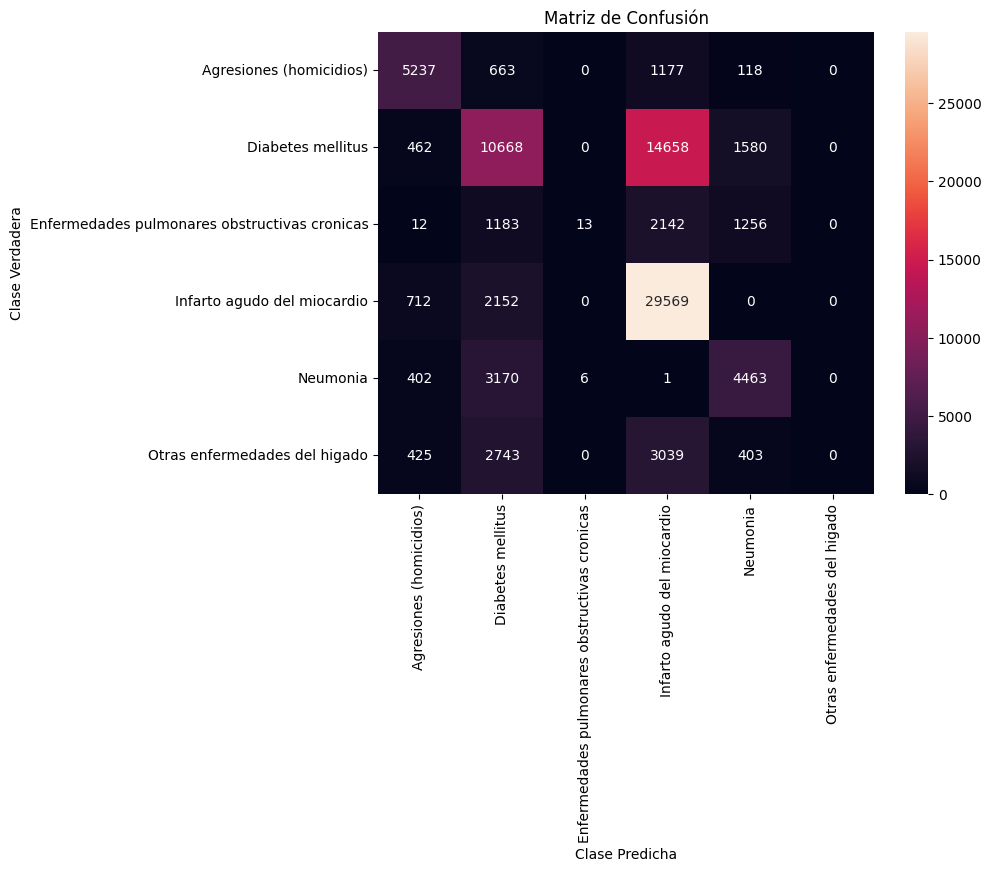

In [78]:
# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Matriz de Confusión")
plt.ylabel("Clase Verdadera")
plt.xlabel("Clase Predicha")
plt.show()

In [79]:
# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=best_model.classes_))


Reporte de clasificación:


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                               precision    recall  f1-score   support

                      Agresiones (homicidios)       0.72      0.73      0.73      7195
                            Diabetes mellitus       0.52      0.39      0.44     27368
Enfermedades pulmonares obstructivas cronicas       0.68      0.00      0.01      4606
                  Infarto agudo del miocardio       0.58      0.91      0.71     32433
                                     Neumonia       0.57      0.55      0.56      8042
                Otras enfermedades del higado       0.00      0.00      0.00      6610

                                     accuracy                           0.58     86254
                                    macro avg       0.51      0.43      0.41     86254
                                 weighted avg       0.53      0.58      0.52     86254



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
